Insert number of assets:1
Insert ticker of the asset number 0:^gspc
Insert weight of the asset  ^gspc:1


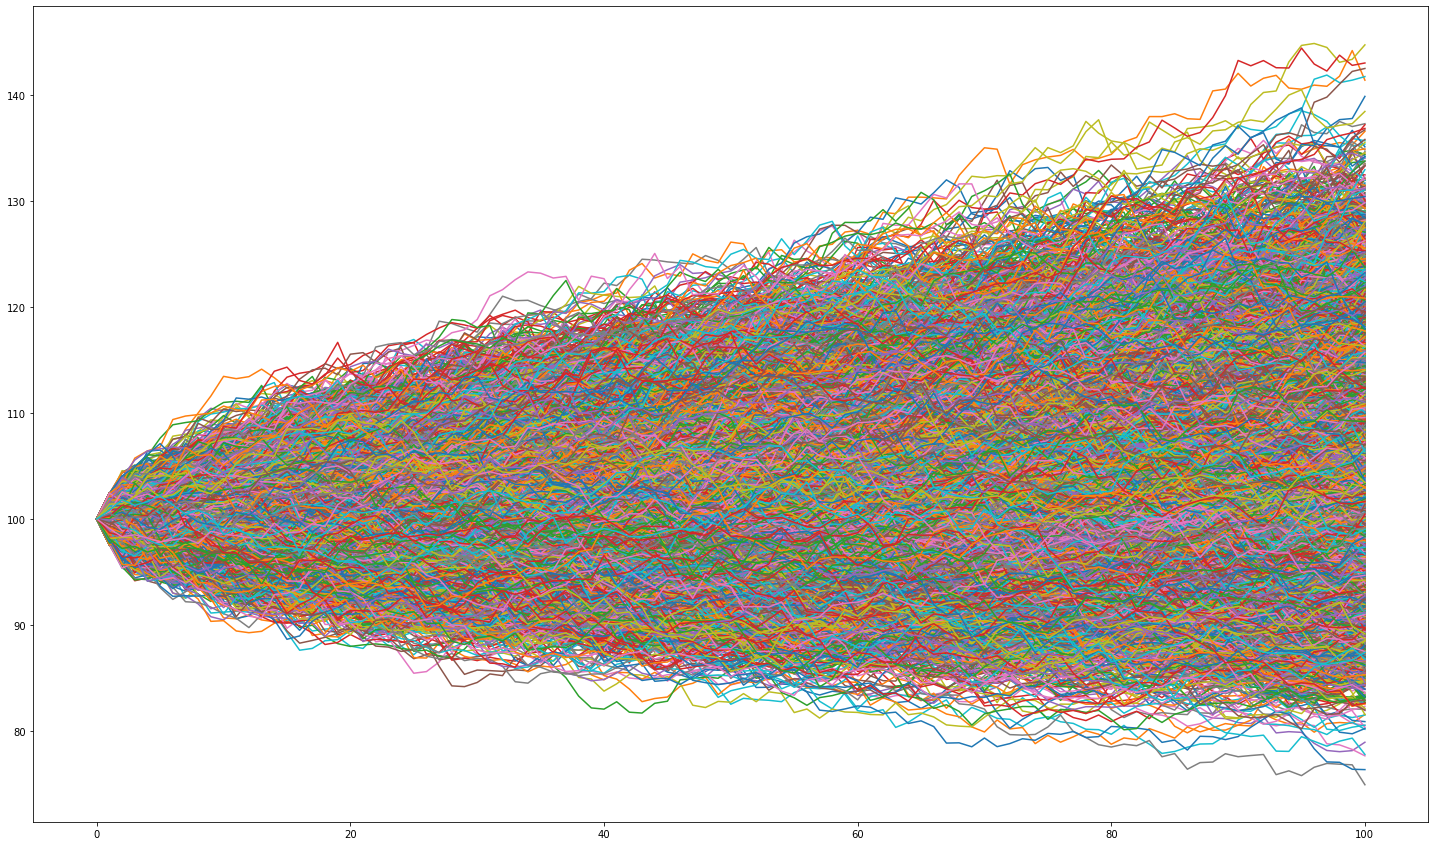

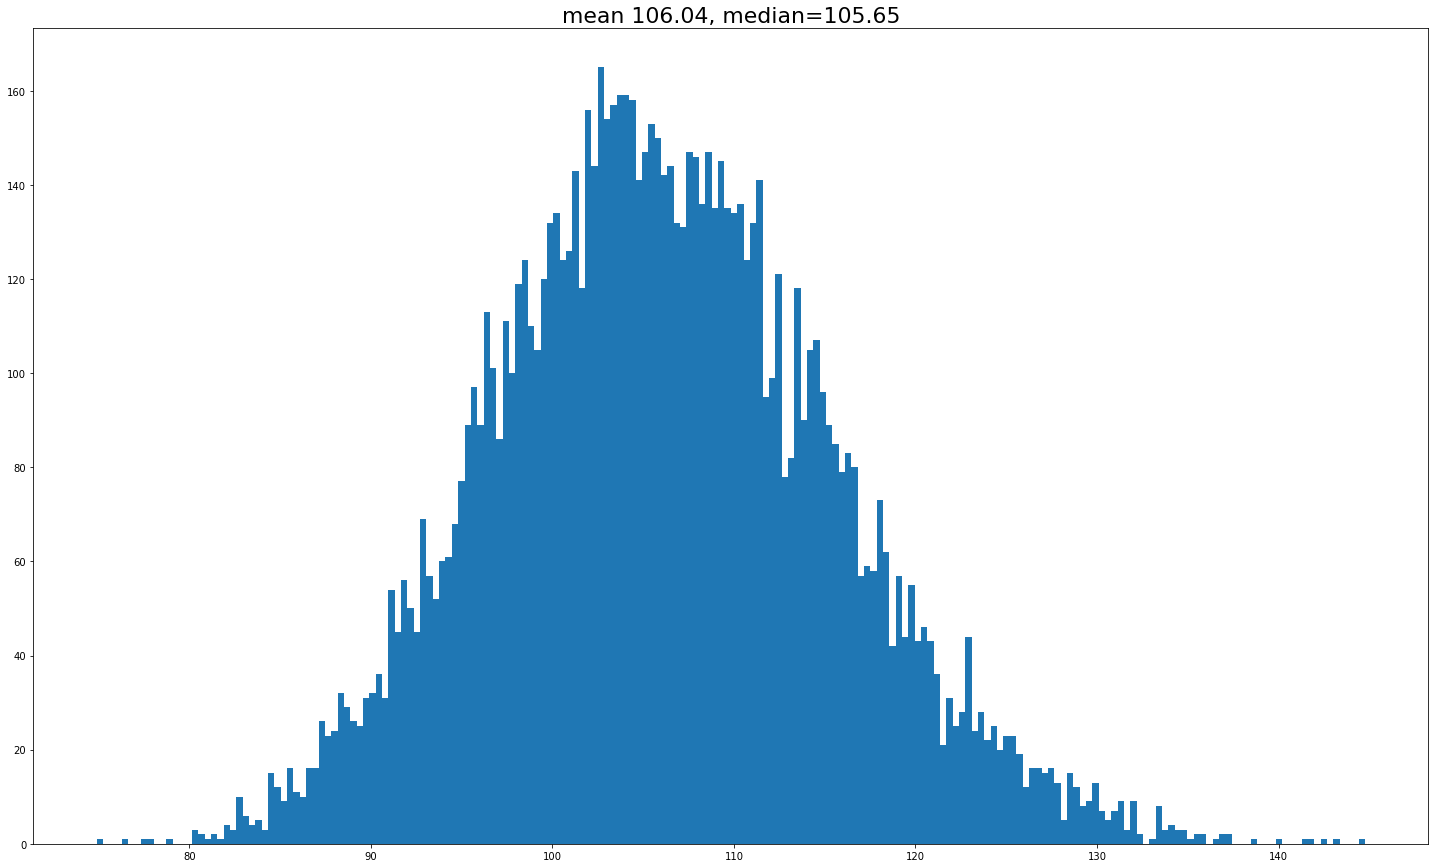

In [80]:
import yahoo_fin.stock_info as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
from datetime import timedelta


t=[]
w=[]
nt = int(input('Insert number of assets:'))

for i in range(nt):
    ticker = str(input('''Insert ticker of the asset number ''' + str(i) + ':'))
    weight= float(input('''Insert weight of the asset  ''' + ticker + ':'))
    t.append(ticker)
    w.append(weight)

Start=str(datetime.now()-timedelta(days=360))
End=str(datetime.now())
Period='1d'    

Matrix_returns=pd.DataFrame()

for x in t:
    Stock_data = yf.get_data(x, start_date=Start, end_date=End, interval=Period)
    Stock_data = Stock_data['close']

    V_returns=[]
    
    for i in range (0,len(Stock_data)-1):
        Return=Stock_data[i+1]/Stock_data[i]
        V_returns.append(Return)
    
    Matrix_returns[x]=V_returns     
    
num_simulations=10000
num_days=100
starting_wealth=100

MC=[]
end_wealth=[]

plt.figure(figsize=(25,15))

for i in range(0, num_simulations):
    TS=[]
    TS.append(100)
    Bootstrap_returns=pd.DataFrame()
    Daily_returns=[]
    
    
    for x in t:
        Bootstrap_returns[x]=(np.random.choice(Matrix_returns[x], num_days))
        
    for i in range(len(Bootstrap_returns)):
        Daily_return=0.0
        
        for ii in range(len(t)):
            Daily_return=Daily_return+Bootstrap_returns.iat[i, ii]*w[ii]
        
        Daily_returns.append(Daily_return)
        
    for i in range(len(Daily_returns)):
        
        d=TS[i]*Daily_returns[i]
        TS.append(d)
   
    df=pd.DataFrame(index=range(num_days+1), data={'TS':TS} )
    MC.append(df)
    plt.plot(TS)
    end_wealth.append(TS[len(TS)-1])

    
mean=str(round(np.mean(end_wealth), 2))
median=str(round(np.median(end_wealth), 2))

plt.figure(figsize=(25,15))
plt.hist(end_wealth, bins=200)
plt.title('mean '+ mean +', median='+ median , fontsize=22)
plt.savefig('MC_sim.png')
plt.show()